In [1]:
import pandas as pd
from google.colab import drive

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder

!pip install --upgrade category_encoders
import category_encoders  as ce
from matplotlib import pyplot as plt

drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.3 MB/s eta 0:00:00
Mounted at /content/drive


In [2]:
data_frame = pd.read_csv("/content/drive/MyDrive/Organizacion De Datos/trabajo_practico_2/secondary_data.csv",sep=";")

In [3]:
data_frame.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


Para aquellas filas con mucho porcentaje de nans ***(a mi criterio, las que tienen+60%)*** , voy a fillearlas con 'unknown', mientras que aquellas que tengan porcentaje bajo, voy a usar el **'most-frequent strategy'** de simpleImputer

In [4]:
(( len(data_frame) - data_frame.count() )*100 / len(data_frame)).nlargest(len(data_frame.columns))

veil-type               94.797688
spore-print-color       89.595376
veil-color              87.861272
stem-root               84.393064
stem-surface            62.427746
gill-spacing            41.040462
cap-surface             23.121387
gill-attachment         16.184971
ring-type                4.046243
class                    0.000000
stem-color               0.000000
habitat                  0.000000
has-ring                 0.000000
stem-width               0.000000
cap-diameter             0.000000
stem-height              0.000000
gill-color               0.000000
does-bruise-or-bleed     0.000000
cap-color                0.000000
cap-shape                0.000000
season                   0.000000
dtype: float64

# Separando la variable a predecir

In [5]:
X = data_frame.drop('class', axis=1)
y = data_frame['class']

In [6]:
y = y.map({"e":1,"p":0})

# Division de sets 

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=13)

# Imputacion

`Imputacion 1) Reemplazar por una constante`

In [8]:
X_train[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ] = X_train[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ].fillna('unknown')
X_validation[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ] = X_validation[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ].fillna('unknown')
X_test[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ] = X_test[ ['veil-type','spore-print-color','veil-color','stem-root','stem-surface'] ].fillna('unknown')

`Imputacion 2) Reemplazar por el mas frecuente`

In [9]:
from sklearn.impute import SimpleImputer
simple = SimpleImputer(strategy='most_frequent')

In [10]:
X_train = pd.DataFrame(simple.fit_transform(X_train), columns = X_train.columns)
X_validation = pd.DataFrame(simple.transform(X_validation), columns = X_validation.columns)
X_test = pd.DataFrame(simple.transform(X_test), columns = X_test.columns)

In [11]:
X_train[ ['cap-diameter', 'stem-height', 'stem-width'] ] = X_train[ ['cap-diameter', 'stem-height', 'stem-width'] ].astype(float)
X_validation[ ['cap-diameter', 'stem-height', 'stem-width'] ] = X_validation[ ['cap-diameter', 'stem-height', 'stem-width'] ].astype(float)
X_test[ ['cap-diameter', 'stem-height', 'stem-width'] ] = X_test[ ['cap-diameter', 'stem-height', 'stem-width'] ].astype(float)


# Encodings

OHE Encoding

In [12]:
ohe_ring = OneHotEncoder(drop='first')

encoded_ring_train = ohe_ring.fit_transform(X_train[['has-ring']]).todense().astype(int)
encoded_ring_validation = ohe_ring.transform(X_validation[['has-ring']]).todense().astype(int)
encoded_ring_test = ohe_ring.transform(X_test[['has-ring']]).todense().astype(int)

encoded_bruise_train = ohe_ring.fit_transform(X_train[['does-bruise-or-bleed']]).todense().astype(int)
encoded_bruise_validation = ohe_ring.transform(X_validation[['does-bruise-or-bleed']]).todense().astype(int)
encoded_bruise_test = ohe_ring.transform(X_test[['does-bruise-or-bleed']]).todense().astype(int)

In [13]:
X_train['has-ring'] = encoded_ring_train
X_validation['has-ring'] = encoded_ring_validation
X_test['has-ring'] = encoded_ring_test

X_train['does-bruise-or-bleed'] = encoded_bruise_train
X_validation['does-bruise-or-bleed'] = encoded_bruise_validation
X_test['does-bruise-or-bleed'] = encoded_bruise_test

In [14]:
X_train

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.74,f,k,n,0,d,c,y,5.02,28.73,unknown,k,n,unknown,unknown,0,f,unknown,d,a
1,1.27,f,s,y,0,f,f,f,3.79,5.63,unknown,unknown,y,unknown,unknown,0,f,unknown,d,a
2,12.05,f,y,e,0,a,c,w,6.03,23.98,b,unknown,n,unknown,w,1,e,unknown,d,a
3,8.08,x,t,y,0,p,c,y,6.04,14.95,unknown,unknown,y,unknown,y,1,f,unknown,d,a
4,6.44,x,h,n,0,e,c,w,12.23,12.77,unknown,s,w,u,w,0,f,unknown,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48850,8.53,o,t,n,0,f,f,f,3.63,25.28,unknown,g,n,unknown,unknown,0,f,unknown,d,s
48851,10.66,f,e,b,0,a,c,b,5.10,19.52,unknown,unknown,w,unknown,unknown,1,f,unknown,d,a
48852,1.62,x,i,k,0,a,c,w,3.73,2.63,unknown,unknown,w,unknown,unknown,0,f,p,g,a
48853,1.29,x,t,n,0,a,c,n,5.00,2.45,unknown,s,n,unknown,unknown,0,f,k,g,a


binaryEncoding

In [15]:
bin_encoded = ce.BinaryEncoder(cols=["cap-shape","cap-surface","cap-color","gill-attachment","gill-spacing","gill-color","stem-root","stem-surface",
                                     "stem-color","veil-type","veil-color","ring-type","spore-print-color","habitat" ,"season"], return_df = True)

X_train = bin_encoded.fit_transform(X_train)
X_validation = bin_encoded.transform(X_validation)
X_test = bin_encoded.transform(X_test)

In [16]:
X_train

,cap-diameter,cap-shape_0,cap-shape_1,cap-shape_2,cap-surface_0,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_0,cap-color_1,...,spore-print-color_1,spore-print-color_2,spore-print-color_3,habitat_0,habitat_1,habitat_2,habitat_3,season_0,season_1,season_2
0,15.74,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
1,1.27,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,12.05,0,0,1,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,0,1
3,8.08,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,6.44,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48850,8.53,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
48851,10.66,0,0,1,0,1,1,1,1,0,...,0,0,1,0,0,0,1,0,0,1
48852,1.62,0,1,0,1,0,0,1,1,1,...,1,0,1,0,0,1,1,0,0,1
48853,1.29,0,1,0,0,1,0,0,0,0,...,1,1,1,0,0,1,1,0,0,1


# FALTA AGREGAR MEAN ENCODING

# XGBoost

In [17]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn import tree

import lightgbm as lgb

## Busqueda de hiper-parametros

In [18]:
from sklearn.model_selection import RandomizedSearchCV

In [19]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {
      'n_estimators':np.arange(10, 120, 10),
      'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
      'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
      'min_child_weight' : [ 1, 3, 5, 7 ],
      'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
      'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [20]:
rs_xg_class = RandomizedSearchCV(clf_xgb, param_distributions = param_dist, n_iter=5, random_state = 13, scoring='roc_auc')

## Entrenamos y predecimos

In [21]:
rs_xg_class.fit(X_train, y_train)
preds = rs_xg_class.predict(X_validation)

## Mejores hiper-parametros

In [22]:
rs_xg_class.best_params_

{'n_estimators': 80,
 'min_child_weight': 3,
 'max_depth': 8,
 'learning_rate': 0.3,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

## Mejor modelo

In [23]:
model = rs_xg_class.best_estimator_

In [24]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=80, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Matriz de confusión

In [25]:
cm = confusion_matrix(y_validation, preds)
cm

array([[3374,    0],
       [   0, 2733]])

## **Score para validation**

In [26]:
auc_result_XGBoost = roc_auc_score(y_validation, model.predict_proba(X_validation)[:,1])
print("AUC_ROC: %f" % (auc_result_XGBoost))

AUC_ROC: 1.000000


## **Score final en Test**

In [27]:
auc_result_XGBoost_test_only = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print("AUC_ROC: %f" % (auc_result_XGBoost))

AUC_ROC: 1.000000


## Feature importance

In [29]:
XGBoost_features_list = model.feature_names_in_
XGBoost_features_imporance_list = model.feature_importances_

In [30]:
XGBoost_dicc = {}
for i in range ( 0 , len(XGBoost_features_list) ):
  features_binary_clean = XGBoost_features_list[i].split('_')[0]
  if features_binary_clean not in XGBoost_dicc:
    XGBoost_dicc[features_binary_clean] = XGBoost_features_imporance_list[i]
  else:
    XGBoost_dicc[features_binary_clean] += XGBoost_features_imporance_list[i]

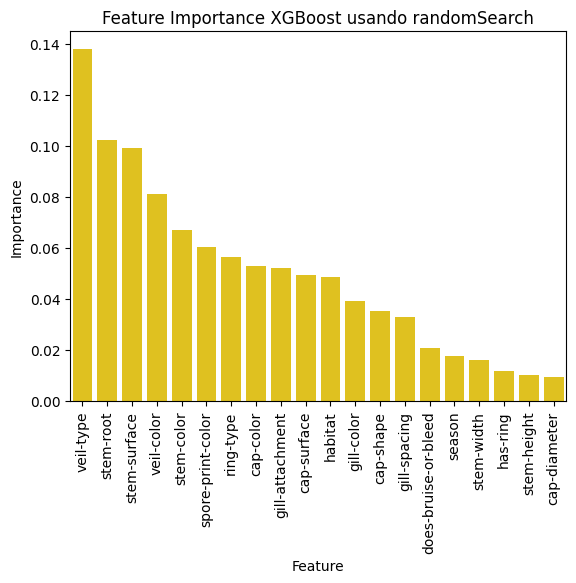

In [31]:
feature_importance_df = pd.DataFrame(XGBoost_dicc.items())
feature_importance_df.columns = ['Feature' , 'Importance']
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending = False)
import seaborn as sns
ax = sns.barplot(x='Feature', y='Importance', data=feature_importance_df, color = 'Gold')
ax.set(xlabel = 'Feature', ylabel='Importance', title='Feature Importance XGBoost (usando randomSearchCV)',)
plt.xticks(rotation=90)
plt.show()